<a href="https://colab.research.google.com/github/Annyatoma/Intrusion-Detection-System/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In today's interconnected digital world, cybersecurity has become a critical concern for organizations and individuals alike. As the number and complexity of cyber threats continue to grow, traditional security measures such as firewalls and antivirus software are no longer sufficient. An **Intrusion Detection System (IDS)** serves as a crucial layer of defense by monitoring network or system activities for malicious behavior or policy violations.

This project focuses on the development of an IDS using **machine learning** techniques to accurately detect and classify different types of cyber attacks. By training models on benchmark datasets like **NSL-KDD**, the system learns to distinguish between normal and suspicious activities. The goal is to create an efficient, intelligent IDS that can not only detect intrusions in real-time but also adapt to new and evolving threats, thereby enhancing the overall security posture of a digital environment.

# **Data Description**
For this project, we used the NSL-KDD dataset a widely recognized benchmark dataset for evaluating intrusion detection systems.

1. NSL-KDD Dataset Overview

Purpose: It is designed to overcome some of the limitations of the original KDD Cup 1999 dataset, such as redundant records and imbalanced classes.

Instances:
~125,973 records in the full dataset

Divided into: KDDTrain+, KDDTest+

Features: There are a total of 41 features per instance

Features include:

  1.Basic features: Duration, protocol type, service, flag, etc.

  2.Content features: Number of failed logins, number of file accesses, etc.

 3.Traffic features: Count of connections to the same host, same service, etc.

 2. Attack Categories

Attacks the are grouped into four main categories:

DoS (Denial of Service): Overwhelm resources (e.g., smurf, neptune)

Probe: Surveillance and probing (e.g., portsweep, satan)

R2L (Remote to Local): Unauthorized access from a remote machine (e.g., guess_passwd, warezclient)

U2R (User to Root): Unauthorized root access (e.g., buffer_overflow, perl)

3. Label Structure

Binary Classification: normal vs attack

Multi-Class Classification: Different attack types as individual classes

 4. Preprocessing

Label Encoding: For categorical features (e.g., protocol type, service).

Normalization / Standardization: Applied to numerical features to improve model performance.

Class Balancing: Optional techniques like undersampling, oversampling (e.g., SMOTE) may be applied if class imbalance exists.

# **Technologies and Tools Used**
**Programming Language**

Python: Used for implementing data preprocessing, machine learning models, and evaluation.


**Machine Learning Libraries**

Scikit-learn: For classification algorithms.

Keras : For implementing deep learning models.


**Data Handling & Visualization**

Pandas: For data manipulation and analysis.

NumPy: For numerical operations and array handling.

Matplotlib : For visualizing data distributions and performance metrics.

**Dataset**

NSL-KDD: Benchmark datasets used for training and evaluation.

**Development Environment**

Google Colab: For interactive development and testing.

**Version Control**

GitHub: For source code management and collaboration.

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow

In [ ]:
import pandas as pd
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label']
df = pd.read_csv('/content/KDDTrain+.csv')
df = df.dropna()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns
encoder = LabelEncoder()
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['service'] = encoder.fit_transform(df['service'])
df['flag'] = encoder.fit_transform(df['flag'])


In [ ]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
import pandas as pd
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label']
df2 = pd.read_csv('/content/KDDTest+.csv')
df2 = df.dropna()
df2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
df2['label'] = df2['label'].apply(lambda x: 0 if x == 'normal' else 1)
df3 = df2.drop('label', axis=1)

actual=df2['label']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(df3)
print(classification_report(actual, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.69    125973

    accuracy                           0.52    125973
   macro avg       0.50      0.26      0.34    125973
weighted avg       1.00      0.52      0.69    125973



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divisio

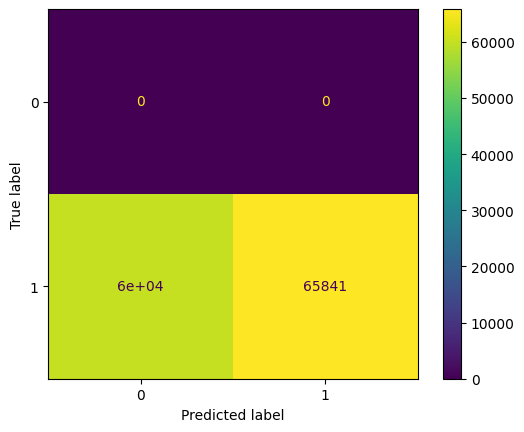

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(actual, y_pred)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9649 - loss: 0.0937
Epoch 2/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9917 - loss: 0.0255
Epoch 3/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9928 - loss: 0.0211
Epoch 4/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0191
Epoch 5/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0173
Epoch 6/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9950 - loss: 0.0145
Epoch 7/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9948 - loss: 0.0146
Epoch 8/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9948 - loss: 0.0140
Epoch 9/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9954 - loss: 0.0124
Epoch 10/10
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9961 - loss: 0.0112


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3334
           1       1.00      1.00      1.00      2965

    accuracy                           1.00      6299
   macro avg       1.00      1.00      1.00      6299
weighted avg       1.00      1.00      1.00      6299



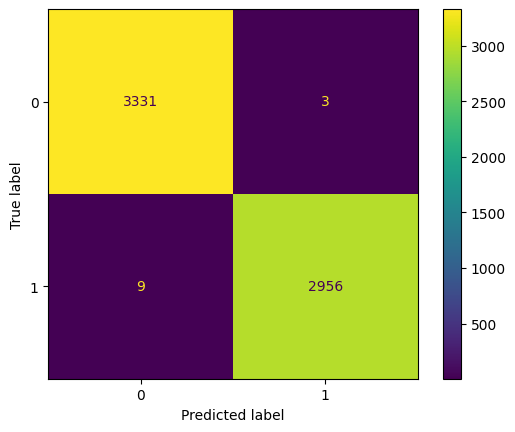

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - loss: 0.0147
Test Accuracy: 0.9938085675239563


In [ ]:
loss, accuracy = model.evaluate(df3, actual)
print(f"Test Accuracy: {accuracy}")


3937/3937 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8321 - loss: 4671.9468
Test Accuracy: 0.8322973847389221


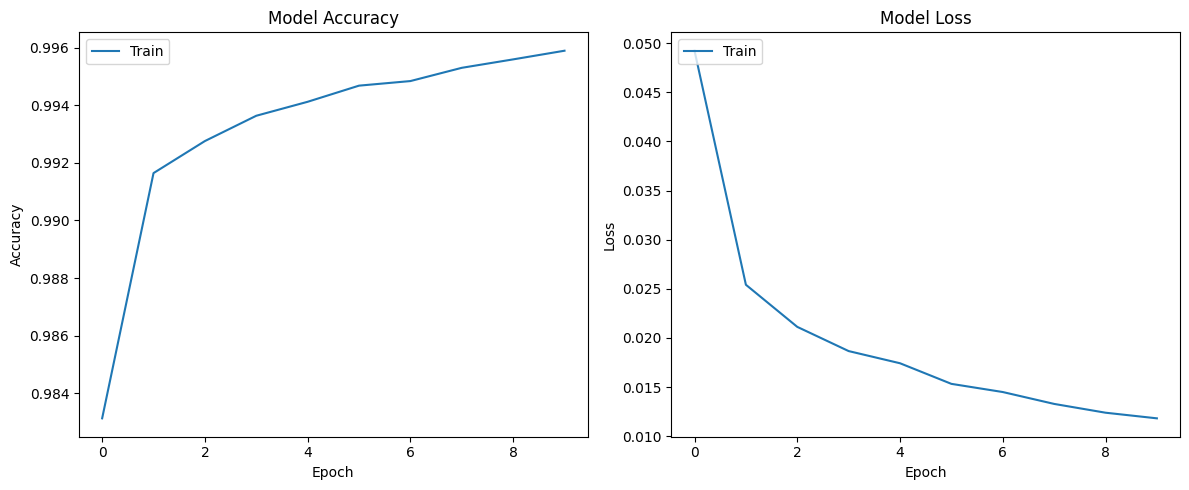

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train'], loc='upper left')

# Plot loss
axes[1].plot(history.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()